# Name -  Datamites Certified Data Scientist Course

### Project : III
#### Project ID : PRCP-1001-RiceLeaf 
#### Project description : Rice Leaf Disease using CNN

In [1]:
# Importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D ,Flatten , Dense, Dropout 
#from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, CSVLogger
import os
import cv2

#### Overall approach for the project

In [2]:
#To generate multimple images for train and test data

DataGen = ImageDataGenerator(rotation_range = 40, width_shift_range = .2,
                                    height_shift_range = .2, shear_range = .2, 
                                    zoom_range = .2, horizontal_flip = True, fill_mode = 'nearest')

#### Now we have the collections of images as follows :-

* Training Data - 1200 images
* Test Data - 240 images

#### Getting the augmented train and test data from the image repository

In [2]:
path_train = r"E:\Datamites_Certified data scientist\Capstone Projects\PRCP-1001-RiceLeaf\Project\projABC_aug\Train_augA"


path_test = r"E:\Datamites_Certified data scientist\Capstone Projects\PRCP-1001-RiceLeaf\Project\projABC_aug\Test_augA"


In [3]:
# Showing augmented images

def plotImages(images_array):
    fig, axes = plt.subplots(1, 5, figsize = (20,20))
    axes = axes.flatten()
    for img, ax in zip (images_array, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [4]:
# Let us try to create more images for our train dataset using the function as given below :

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [5]:
# Generate more images for training data :

# This generator will read pictures found in the training_data_path, and indefinitely generate batches of augmented image data


training_data = train_datagen.flow_from_directory(path_train, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      shuffle=True,
                                      class_mode='binary')

Found 1200 images belonging to 3 classes.


In [6]:
training_data.class_indices

{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}

In [7]:
# This is the augmentation configuration we will use for validation / test data :

test_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [8]:
# This is a similar generator, for validation data / test data :

# This generator will read pictures found in the training_data_path, and indefinitely generate batches of augmented image data

test_data = test_datagen.flow_from_directory(path_test,
                                  target_size=(150,150),
                                  batch_size=32,
                                  shuffle=True,
                                  class_mode='binary')

Found 240 images belonging to 3 classes.


In [9]:
test_data.class_indices

{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}

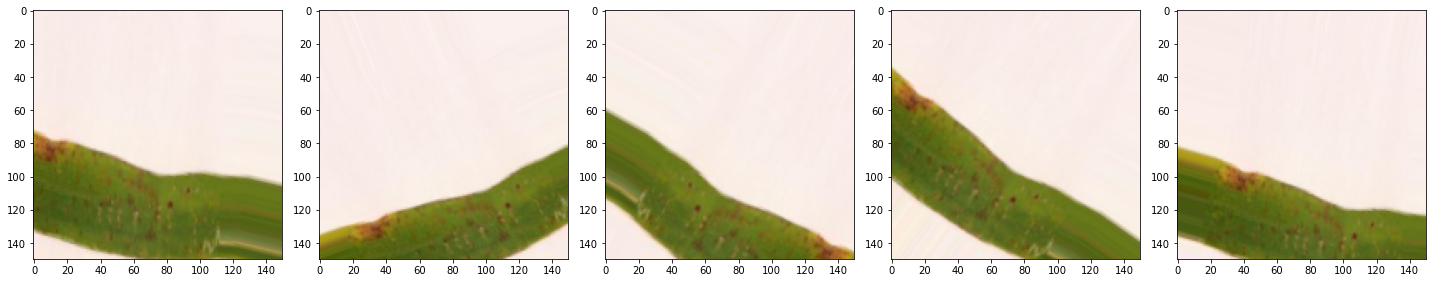

In [10]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

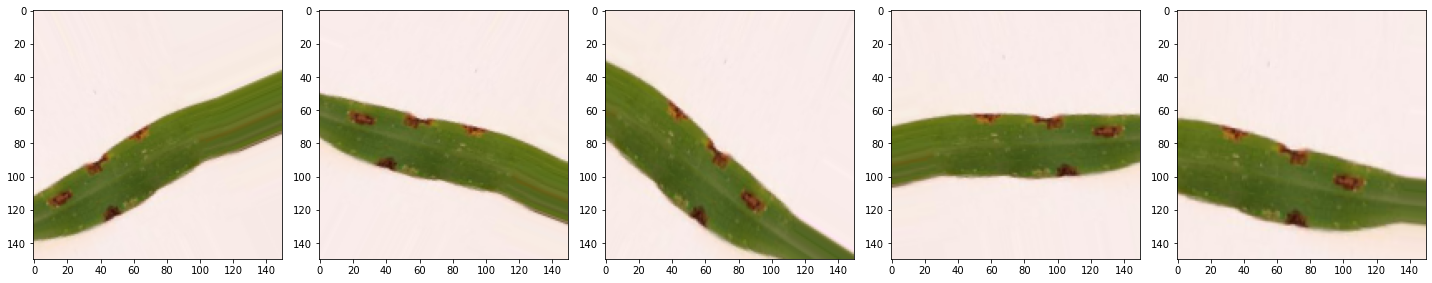

In [11]:
images = [test_data[0][0][0] for i in range(5)]
plotImages(images)

##### Let us create a path where our model will saved - with model path
##### Let us monitor the validation accuracy and save the model with best validation accuracy
##### Let us save the model in the csv format in order to generate graphs
##### We will do it with the help of callbacks

In [12]:
model_path = 'E:/Datamites_Certified data scientist/Capstone Projects/PRCP-1001-RiceLeaf/Project/25Jul_Final/riceleafpred_modelv16.h5' # Hierarchial data format
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
log_csv = CSVLogger('my_logs_v16.csv', separator = ',', append=False)
callbacks_list = [checkpoint, log_csv]

##### Let us build the CNN model

In [13]:
# Build the CNN model

model = Sequential()
model.add(Conv2D(filters = 16 , kernel_size =(3,3) ,  activation ='relu' , input_shape = [150, 150, 3]  ))
model.add(MaxPool2D(pool_size =(2,2)))


model.add(Conv2D(filters = 32 , kernel_size =(3,3) , activation= 'relu'))
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Flatten())

model.add(Dense(128 , activation = 'relu' , input_shape = [150, 150, 3]))
model.add(Dropout(0.4))
model.add(Dense(3 , activation= 'softmax'))

model.compile(optimizer=Adam(lr=0.0001), loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

##### Let us train the CNN model using training data, test data, for 500 epochs and our callback list

In [14]:
# Train cnn model

history = model.fit_generator(training_data, epochs=500, verbose=1, validation_data= test_data, callbacks=callbacks_list)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/500
38/38 [==============================] - ETA: 0s - loss: 1.0844 - accuracy: 0.3933
Epoch 00001: val_accuracy improved from -inf to 0.46667, saving model to E:/Datamites_Certified data scientist/Capstone Projects/PRCP-1001-RiceLeaf/Project/25Jul_Final\riceleafpred_modelv16.h5
38/38 [==============================] - 39s 1s/step - loss: 1.0844 - accuracy: 0.3933 - val_loss: 1.0128 - val_accuracy: 0.4667
Epoch 2/500
38/38 [==============================] - ETA: 0s - loss: 1.0174 - accuracy: 0.4467
Epoch 00002: val_accuracy did not improve from 0.46667
38/38 [==============================] - 23s 603ms/step - loss: 1.0174 - accuracy: 0.4467 - val_loss: 1.0122 - val_accuracy: 0.4667
Epoch 3/500
38/38 [==============================] - ETA: 0s - loss: 0.9790 - accuracy: 0.4958
Epoch 00003: val_accuracy improved from 0.46667 to 0.55417, saving model to E:/Datamites_Certified data scientist/Capstone Project

Epoch 24/500
38/38 [==============================] - ETA: 0s - loss: 0.6485 - accuracy: 0.7175
Epoch 00024: val_accuracy improved from 0.71250 to 0.71667, saving model to E:/Datamites_Certified data scientist/Capstone Projects/PRCP-1001-RiceLeaf/Project/25Jul_Final\riceleafpred_modelv16.h5
38/38 [==============================] - 23s 610ms/step - loss: 0.6485 - accuracy: 0.7175 - val_loss: 0.6856 - val_accuracy: 0.7167
Epoch 25/500
38/38 [==============================] - ETA: 0s - loss: 0.6445 - accuracy: 0.7125
Epoch 00025: val_accuracy did not improve from 0.71667
38/38 [==============================] - 25s 655ms/step - loss: 0.6445 - accuracy: 0.7125 - val_loss: 0.6906 - val_accuracy: 0.7000
Epoch 26/500
38/38 [==============================] - ETA: 0s - loss: 0.6269 - accuracy: 0.7183
Epoch 00026: val_accuracy did not improve from 0.71667
38/38 [==============================] - 22s 585ms/step - loss: 0.6269 - accuracy: 0.7183 - val_loss: 0.7039 - val_accuracy: 0.6958
Epoch 27/5

Epoch 51/500
38/38 [==============================] - ETA: 0s - loss: 0.4761 - accuracy: 0.8050
Epoch 00051: val_accuracy did not improve from 0.78333
38/38 [==============================] - 22s 590ms/step - loss: 0.4761 - accuracy: 0.8050 - val_loss: 0.6089 - val_accuracy: 0.7625
Epoch 52/500
38/38 [==============================] - ETA: 0s - loss: 0.4627 - accuracy: 0.8158
Epoch 00052: val_accuracy did not improve from 0.78333
38/38 [==============================] - 22s 585ms/step - loss: 0.4627 - accuracy: 0.8158 - val_loss: 0.6212 - val_accuracy: 0.7125
Epoch 53/500
38/38 [==============================] - ETA: 0s - loss: 0.4591 - accuracy: 0.8083
Epoch 00053: val_accuracy did not improve from 0.78333
38/38 [==============================] - 22s 590ms/step - loss: 0.4591 - accuracy: 0.8083 - val_loss: 0.5591 - val_accuracy: 0.7625
Epoch 54/500
38/38 [==============================] - ETA: 0s - loss: 0.4424 - accuracy: 0.8142
Epoch 00054: val_accuracy did not improve from 0.78333


Epoch 78/500
38/38 [==============================] - ETA: 0s - loss: 0.3667 - accuracy: 0.8517
Epoch 00078: val_accuracy did not improve from 0.83333
38/38 [==============================] - 22s 586ms/step - loss: 0.3667 - accuracy: 0.8517 - val_loss: 0.5128 - val_accuracy: 0.7875
Epoch 79/500
38/38 [==============================] - ETA: 0s - loss: 0.3612 - accuracy: 0.8550
Epoch 00079: val_accuracy improved from 0.83333 to 0.83750, saving model to E:/Datamites_Certified data scientist/Capstone Projects/PRCP-1001-RiceLeaf/Project/25Jul_Final\riceleafpred_modelv16.h5
38/38 [==============================] - 23s 599ms/step - loss: 0.3612 - accuracy: 0.8550 - val_loss: 0.4785 - val_accuracy: 0.8375
Epoch 80/500
38/38 [==============================] - ETA: 0s - loss: 0.3576 - accuracy: 0.8550
Epoch 00080: val_accuracy did not improve from 0.83750
38/38 [==============================] - 22s 584ms/step - loss: 0.3576 - accuracy: 0.8550 - val_loss: 0.5604 - val_accuracy: 0.7792
Epoch 81/5

Epoch 106/500
38/38 [==============================] - ETA: 0s - loss: 0.2753 - accuracy: 0.8933
Epoch 00106: val_accuracy did not improve from 0.86667
38/38 [==============================] - 23s 607ms/step - loss: 0.2753 - accuracy: 0.8933 - val_loss: 0.4382 - val_accuracy: 0.8500
Epoch 107/500
38/38 [==============================] - ETA: 0s - loss: 0.2727 - accuracy: 0.8983
Epoch 00107: val_accuracy did not improve from 0.86667
38/38 [==============================] - 22s 592ms/step - loss: 0.2727 - accuracy: 0.8983 - val_loss: 0.4150 - val_accuracy: 0.8542
Epoch 108/500
38/38 [==============================] - ETA: 0s - loss: 0.2566 - accuracy: 0.8975
Epoch 00108: val_accuracy did not improve from 0.86667
38/38 [==============================] - 23s 593ms/step - loss: 0.2566 - accuracy: 0.8975 - val_loss: 0.4375 - val_accuracy: 0.8500
Epoch 109/500
38/38 [==============================] - ETA: 0s - loss: 0.2684 - accuracy: 0.9008
Epoch 00109: val_accuracy did not improve from 0.86

Epoch 133/500
38/38 [==============================] - ETA: 0s - loss: 0.2082 - accuracy: 0.9233
Epoch 00133: val_accuracy did not improve from 0.89583
38/38 [==============================] - 22s 586ms/step - loss: 0.2082 - accuracy: 0.9233 - val_loss: 0.4337 - val_accuracy: 0.8708
Epoch 134/500
38/38 [==============================] - ETA: 0s - loss: 0.2160 - accuracy: 0.9225
Epoch 00134: val_accuracy did not improve from 0.89583
38/38 [==============================] - 22s 585ms/step - loss: 0.2160 - accuracy: 0.9225 - val_loss: 0.3924 - val_accuracy: 0.8917
Epoch 135/500
38/38 [==============================] - ETA: 0s - loss: 0.2370 - accuracy: 0.9083
Epoch 00135: val_accuracy did not improve from 0.89583
38/38 [==============================] - 24s 620ms/step - loss: 0.2370 - accuracy: 0.9083 - val_loss: 0.3695 - val_accuracy: 0.8708
Epoch 136/500
38/38 [==============================] - ETA: 0s - loss: 0.2123 - accuracy: 0.9158
Epoch 00136: val_accuracy did not improve from 0.89

Epoch 162/500
38/38 [==============================] - ETA: 0s - loss: 0.1671 - accuracy: 0.9450
Epoch 00162: val_accuracy did not improve from 0.91250
38/38 [==============================] - 22s 589ms/step - loss: 0.1671 - accuracy: 0.9450 - val_loss: 0.4019 - val_accuracy: 0.8833
Epoch 163/500
38/38 [==============================] - ETA: 0s - loss: 0.1554 - accuracy: 0.9425
Epoch 00163: val_accuracy did not improve from 0.91250
38/38 [==============================] - 22s 585ms/step - loss: 0.1554 - accuracy: 0.9425 - val_loss: 0.4047 - val_accuracy: 0.8875
Epoch 164/500
38/38 [==============================] - ETA: 0s - loss: 0.1637 - accuracy: 0.9392
Epoch 00164: val_accuracy did not improve from 0.91250
38/38 [==============================] - 22s 583ms/step - loss: 0.1637 - accuracy: 0.9392 - val_loss: 0.4187 - val_accuracy: 0.8750
Epoch 165/500
38/38 [==============================] - ETA: 0s - loss: 0.1654 - accuracy: 0.9408
Epoch 00165: val_accuracy did not improve from 0.91

Epoch 191/500
38/38 [==============================] - ETA: 0s - loss: 0.1405 - accuracy: 0.9442
Epoch 00191: val_accuracy did not improve from 0.91250
38/38 [==============================] - 22s 583ms/step - loss: 0.1405 - accuracy: 0.9442 - val_loss: 0.4380 - val_accuracy: 0.8583
Epoch 192/500
38/38 [==============================] - ETA: 0s - loss: 0.1334 - accuracy: 0.9550
Epoch 00192: val_accuracy did not improve from 0.91250
38/38 [==============================] - 22s 582ms/step - loss: 0.1334 - accuracy: 0.9550 - val_loss: 0.4650 - val_accuracy: 0.8667
Epoch 193/500
38/38 [==============================] - ETA: 0s - loss: 0.1333 - accuracy: 0.9475
Epoch 00193: val_accuracy did not improve from 0.91250
38/38 [==============================] - 22s 578ms/step - loss: 0.1333 - accuracy: 0.9475 - val_loss: 0.4074 - val_accuracy: 0.8917
Epoch 194/500
38/38 [==============================] - ETA: 0s - loss: 0.1398 - accuracy: 0.9475
Epoch 00194: val_accuracy did not improve from 0.91

Epoch 220/500
38/38 [==============================] - ETA: 0s - loss: 0.1143 - accuracy: 0.9583
Epoch 00220: val_accuracy did not improve from 0.92500
38/38 [==============================] - 22s 589ms/step - loss: 0.1143 - accuracy: 0.9583 - val_loss: 0.3753 - val_accuracy: 0.9000
Epoch 221/500
38/38 [==============================] - ETA: 0s - loss: 0.1427 - accuracy: 0.9383
Epoch 00221: val_accuracy did not improve from 0.92500
38/38 [==============================] - 23s 593ms/step - loss: 0.1427 - accuracy: 0.9383 - val_loss: 0.4473 - val_accuracy: 0.8750
Epoch 222/500
38/38 [==============================] - ETA: 0s - loss: 0.1478 - accuracy: 0.9400
Epoch 00222: val_accuracy did not improve from 0.92500
38/38 [==============================] - 22s 585ms/step - loss: 0.1478 - accuracy: 0.9400 - val_loss: 0.4006 - val_accuracy: 0.8500
Epoch 223/500
38/38 [==============================] - ETA: 0s - loss: 0.1235 - accuracy: 0.9517
Epoch 00223: val_accuracy did not improve from 0.92

Epoch 249/500
38/38 [==============================] - ETA: 0s - loss: 0.0996 - accuracy: 0.9650
Epoch 00249: val_accuracy did not improve from 0.92500
38/38 [==============================] - 23s 611ms/step - loss: 0.0996 - accuracy: 0.9650 - val_loss: 0.3883 - val_accuracy: 0.9000
Epoch 250/500
38/38 [==============================] - ETA: 0s - loss: 0.1097 - accuracy: 0.9608
Epoch 00250: val_accuracy did not improve from 0.92500
38/38 [==============================] - 23s 607ms/step - loss: 0.1097 - accuracy: 0.9608 - val_loss: 0.4678 - val_accuracy: 0.9042
Epoch 251/500
38/38 [==============================] - ETA: 0s - loss: 0.1037 - accuracy: 0.9650
Epoch 00251: val_accuracy did not improve from 0.92500
38/38 [==============================] - 23s 603ms/step - loss: 0.1037 - accuracy: 0.9650 - val_loss: 0.4596 - val_accuracy: 0.8917
Epoch 252/500
38/38 [==============================] - ETA: 0s - loss: 0.1070 - accuracy: 0.9600
Epoch 00252: val_accuracy did not improve from 0.92

Epoch 278/500
38/38 [==============================] - ETA: 0s - loss: 0.0800 - accuracy: 0.9750
Epoch 00278: val_accuracy did not improve from 0.92500
38/38 [==============================] - 24s 644ms/step - loss: 0.0800 - accuracy: 0.9750 - val_loss: 0.3772 - val_accuracy: 0.8917
Epoch 279/500
38/38 [==============================] - ETA: 0s - loss: 0.0797 - accuracy: 0.9733
Epoch 00279: val_accuracy did not improve from 0.92500
38/38 [==============================] - 23s 598ms/step - loss: 0.0797 - accuracy: 0.9733 - val_loss: 0.4348 - val_accuracy: 0.8917
Epoch 280/500
38/38 [==============================] - ETA: 0s - loss: 0.0825 - accuracy: 0.9692
Epoch 00280: val_accuracy did not improve from 0.92500
38/38 [==============================] - 28s 733ms/step - loss: 0.0825 - accuracy: 0.9692 - val_loss: 0.4537 - val_accuracy: 0.8833
Epoch 281/500
38/38 [==============================] - ETA: 0s - loss: 0.0803 - accuracy: 0.9683
Epoch 00281: val_accuracy did not improve from 0.92

Epoch 307/500
38/38 [==============================] - ETA: 0s - loss: 0.0821 - accuracy: 0.9750
Epoch 00307: val_accuracy did not improve from 0.92500
38/38 [==============================] - 23s 598ms/step - loss: 0.0821 - accuracy: 0.9750 - val_loss: 0.6061 - val_accuracy: 0.8625
Epoch 308/500
38/38 [==============================] - ETA: 0s - loss: 0.0706 - accuracy: 0.9758
Epoch 00308: val_accuracy did not improve from 0.92500
38/38 [==============================] - 22s 586ms/step - loss: 0.0706 - accuracy: 0.9758 - val_loss: 0.4883 - val_accuracy: 0.8708
Epoch 309/500
38/38 [==============================] - ETA: 0s - loss: 0.0773 - accuracy: 0.9742
Epoch 00309: val_accuracy did not improve from 0.92500
38/38 [==============================] - 22s 591ms/step - loss: 0.0773 - accuracy: 0.9742 - val_loss: 0.5218 - val_accuracy: 0.8958
Epoch 310/500
38/38 [==============================] - ETA: 0s - loss: 0.0945 - accuracy: 0.9642
Epoch 00310: val_accuracy did not improve from 0.92

Epoch 336/500
38/38 [==============================] - ETA: 0s - loss: 0.0588 - accuracy: 0.9800
Epoch 00336: val_accuracy did not improve from 0.92500
38/38 [==============================] - 22s 589ms/step - loss: 0.0588 - accuracy: 0.9800 - val_loss: 0.4306 - val_accuracy: 0.9125
Epoch 337/500
38/38 [==============================] - ETA: 0s - loss: 0.0757 - accuracy: 0.9683
Epoch 00337: val_accuracy did not improve from 0.92500
38/38 [==============================] - 23s 595ms/step - loss: 0.0757 - accuracy: 0.9683 - val_loss: 0.4541 - val_accuracy: 0.8833
Epoch 338/500
38/38 [==============================] - ETA: 0s - loss: 0.0619 - accuracy: 0.9783
Epoch 00338: val_accuracy did not improve from 0.92500
38/38 [==============================] - 22s 587ms/step - loss: 0.0619 - accuracy: 0.9783 - val_loss: 0.6246 - val_accuracy: 0.8875
Epoch 339/500
38/38 [==============================] - ETA: 0s - loss: 0.0660 - accuracy: 0.9758
Epoch 00339: val_accuracy did not improve from 0.92

Epoch 365/500
38/38 [==============================] - ETA: 0s - loss: 0.0586 - accuracy: 0.9808
Epoch 00365: val_accuracy did not improve from 0.92500
38/38 [==============================] - 22s 589ms/step - loss: 0.0586 - accuracy: 0.9808 - val_loss: 0.4411 - val_accuracy: 0.8958
Epoch 366/500
38/38 [==============================] - ETA: 0s - loss: 0.0554 - accuracy: 0.9817
Epoch 00366: val_accuracy did not improve from 0.92500
38/38 [==============================] - 22s 588ms/step - loss: 0.0554 - accuracy: 0.9817 - val_loss: 0.4456 - val_accuracy: 0.8833
Epoch 367/500
38/38 [==============================] - ETA: 0s - loss: 0.0530 - accuracy: 0.9833
Epoch 00367: val_accuracy did not improve from 0.92500
38/38 [==============================] - 22s 587ms/step - loss: 0.0530 - accuracy: 0.9833 - val_loss: 0.5152 - val_accuracy: 0.8875
Epoch 368/500
38/38 [==============================] - ETA: 0s - loss: 0.0623 - accuracy: 0.9775
Epoch 00368: val_accuracy improved from 0.92500 to 

Epoch 394/500
38/38 [==============================] - ETA: 0s - loss: 0.0601 - accuracy: 0.9825
Epoch 00394: val_accuracy did not improve from 0.92917
38/38 [==============================] - 23s 595ms/step - loss: 0.0601 - accuracy: 0.9825 - val_loss: 0.5251 - val_accuracy: 0.8875
Epoch 395/500
38/38 [==============================] - ETA: 0s - loss: 0.0551 - accuracy: 0.9833
Epoch 00395: val_accuracy did not improve from 0.92917
38/38 [==============================] - 22s 580ms/step - loss: 0.0551 - accuracy: 0.9833 - val_loss: 0.5947 - val_accuracy: 0.8750
Epoch 396/500
38/38 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9867
Epoch 00396: val_accuracy did not improve from 0.92917
38/38 [==============================] - 25s 661ms/step - loss: 0.0440 - accuracy: 0.9867 - val_loss: 0.6570 - val_accuracy: 0.8667
Epoch 397/500
38/38 [==============================] - ETA: 0s - loss: 0.0529 - accuracy: 0.9783
Epoch 00397: val_accuracy did not improve from 0.92

Epoch 423/500
38/38 [==============================] - ETA: 0s - loss: 0.0407 - accuracy: 0.9892
Epoch 00423: val_accuracy did not improve from 0.92917
38/38 [==============================] - 22s 591ms/step - loss: 0.0407 - accuracy: 0.9892 - val_loss: 0.4877 - val_accuracy: 0.8750
Epoch 424/500
38/38 [==============================] - ETA: 0s - loss: 0.0670 - accuracy: 0.9725
Epoch 00424: val_accuracy did not improve from 0.92917
38/38 [==============================] - 23s 597ms/step - loss: 0.0670 - accuracy: 0.9725 - val_loss: 0.3816 - val_accuracy: 0.9042
Epoch 425/500
38/38 [==============================] - ETA: 0s - loss: 0.0506 - accuracy: 0.9842
Epoch 00425: val_accuracy did not improve from 0.92917
38/38 [==============================] - 22s 582ms/step - loss: 0.0506 - accuracy: 0.9842 - val_loss: 0.5368 - val_accuracy: 0.8625
Epoch 426/500
38/38 [==============================] - ETA: 0s - loss: 0.0489 - accuracy: 0.9808
Epoch 00426: val_accuracy did not improve from 0.92

Epoch 452/500
38/38 [==============================] - ETA: 0s - loss: 0.0401 - accuracy: 0.9875
Epoch 00452: val_accuracy did not improve from 0.92917
38/38 [==============================] - 24s 629ms/step - loss: 0.0401 - accuracy: 0.9875 - val_loss: 0.5078 - val_accuracy: 0.8833
Epoch 453/500
38/38 [==============================] - ETA: 0s - loss: 0.0435 - accuracy: 0.9858
Epoch 00453: val_accuracy did not improve from 0.92917
38/38 [==============================] - 23s 594ms/step - loss: 0.0435 - accuracy: 0.9858 - val_loss: 0.5150 - val_accuracy: 0.9000
Epoch 454/500
38/38 [==============================] - ETA: 0s - loss: 0.0464 - accuracy: 0.9850
Epoch 00454: val_accuracy did not improve from 0.92917
38/38 [==============================] - 23s 612ms/step - loss: 0.0464 - accuracy: 0.9850 - val_loss: 0.6539 - val_accuracy: 0.8792
Epoch 455/500
38/38 [==============================] - ETA: 0s - loss: 0.0392 - accuracy: 0.9883
Epoch 00455: val_accuracy did not improve from 0.92

Epoch 481/500
38/38 [==============================] - ETA: 0s - loss: 0.0343 - accuracy: 0.9900
Epoch 00481: val_accuracy did not improve from 0.92917
38/38 [==============================] - 22s 585ms/step - loss: 0.0343 - accuracy: 0.9900 - val_loss: 0.6290 - val_accuracy: 0.8958
Epoch 482/500
38/38 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.9867
Epoch 00482: val_accuracy did not improve from 0.92917
38/38 [==============================] - 47s 1s/step - loss: 0.0432 - accuracy: 0.9867 - val_loss: 0.5160 - val_accuracy: 0.8542
Epoch 483/500
38/38 [==============================] - ETA: 0s - loss: 0.0311 - accuracy: 0.9942
Epoch 00483: val_accuracy did not improve from 0.92917
38/38 [==============================] - 23s 600ms/step - loss: 0.0311 - accuracy: 0.9942 - val_loss: 0.5806 - val_accuracy: 0.8833
Epoch 484/500
38/38 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9833
Epoch 00484: val_accuracy did not improve from 0.92917

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5308544   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [16]:
model.metrics_names

['loss', 'accuracy']

In [17]:
model.history.history

{'loss': [1.0844216346740723,
  1.017351746559143,
  0.9789520502090454,
  0.9385327100753784,
  0.9155324101448059,
  0.8795719146728516,
  0.8549005389213562,
  0.8234215378761292,
  0.8118883371353149,
  0.7991454601287842,
  0.7909321784973145,
  0.781892716884613,
  0.7717987895011902,
  0.7545087933540344,
  0.7325347065925598,
  0.7166446447372437,
  0.7074575424194336,
  0.7202485799789429,
  0.697952151298523,
  0.6867544651031494,
  0.6748684048652649,
  0.6632617712020874,
  0.6464924216270447,
  0.648493230342865,
  0.6444554924964905,
  0.6269029974937439,
  0.6178138256072998,
  0.6163511276245117,
  0.6054752469062805,
  0.6029277443885803,
  0.5883913636207581,
  0.566461980342865,
  0.5697524547576904,
  0.5408461689949036,
  0.547317624092102,
  0.5600217580795288,
  0.5414862036705017,
  0.5732311010360718,
  0.5394993424415588,
  0.5211411118507385,
  0.5161570906639099,
  0.5079787969589233,
  0.5168493390083313,
  0.5101849436759949,
  0.5005139708518982,
  0.4812

In [35]:
data = pd.read_csv('my_logs_v16.csv')
data.head()

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.393333,1.084422,0.466667,1.012788
1,1,0.446667,1.017352,0.466667,1.012215
2,2,0.495833,0.978952,0.554167,0.949535
3,3,0.552500,0.938533,0.570833,0.903877
4,4,0.552500,0.915532,0.620833,0.878642


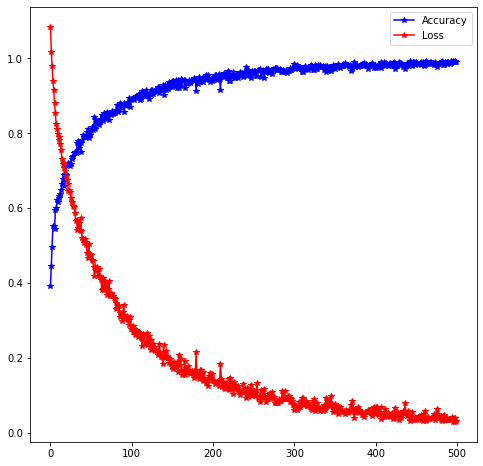

In [37]:
plt.figure(figsize= (8, 8))
plt.plot(data.accuracy, color = "b" , marker ="*" , label = "Accuracy")
plt.plot(data.loss , color = "r" , marker ="*"  , label ="Loss")
plt.legend()

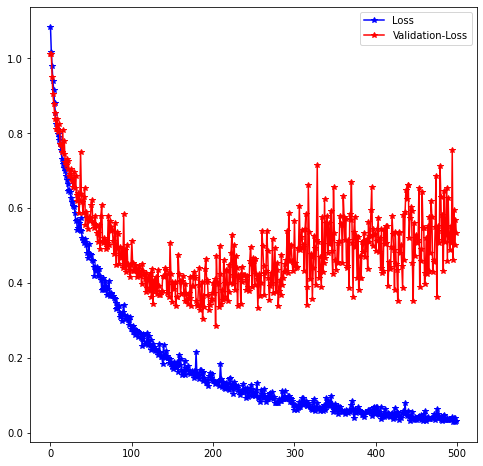

In [38]:
# Plotting the graph for loss and validation loss

plt.figure(figsize= (8, 8))
plt.plot(data.loss, color = "b" , marker ="*" , label = "Loss")
plt.plot(data.val_loss , color = "r" , marker ="*"  , label ="Validation-Loss")
plt.legend()

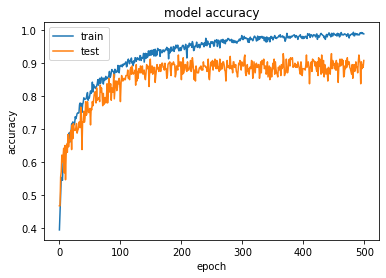

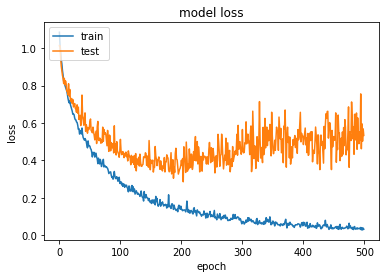

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
# Evaluate the model on training data

model.evaluate(training_data)

38/38 [==============================] - 13s 333ms/step - loss: 0.0244 - accuracy: 0.9925


[0.02437696047127247, 0.9925000071525574]

In [22]:
# Evaluate the model on test data

model.evaluate(test_data)

8/8 [==============================] - 2s 282ms/step - loss: 0.6244 - accuracy: 0.8917


[0.6244351863861084, 0.8916666507720947]

In [23]:
# Prediction on test data

y_pred = model.predict(test_data)
y_pred

array([[1.46148959e-04, 9.99853849e-01, 5.91038471e-08],
       [5.94497956e-02, 9.40550148e-01, 2.19753016e-09],
       [9.86475289e-01, 1.45315251e-03, 1.20715136e-02],
       [9.99687195e-01, 1.38673204e-04, 1.74092493e-04],
       [9.50820029e-01, 8.72885156e-03, 4.04511429e-02],
       [7.35704005e-01, 2.61025548e-01, 3.27049685e-03],
       [6.15595460e-01, 3.84403825e-01, 6.73546822e-07],
       [6.49315655e-01, 9.92767606e-03, 3.40756625e-01],
       [3.42233898e-03, 5.43943606e-05, 9.96523261e-01],
       [1.69044306e-10, 1.00000000e+00, 1.24544333e-27],
       [9.99987245e-01, 1.00904899e-05, 2.64877849e-06],
       [9.99681830e-01, 3.18230363e-04, 3.44306472e-09],
       [9.99999642e-01, 1.90850313e-09, 3.76806923e-07],
       [1.11567912e-04, 9.99888182e-01, 1.92240108e-07],
       [5.87976396e-01, 4.12023425e-01, 2.07896719e-07],
       [2.58842111e-01, 5.51995163e-06, 7.41152346e-01],
       [5.50280452e-01, 3.60372287e-05, 4.49683607e-01],
       [9.81476843e-01, 9.05523

In [24]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2, 2,
       2, 2, 0, 2, 2, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1, 0, 0, 2, 2, 0, 2, 2,
       0, 2, 2, 0, 1, 0, 0, 2, 0, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2,
       0, 1, 1, 2, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0,
       0, 2, 2, 2, 0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2,
       2, 2, 2, 1, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 1, 0, 0, 2, 2, 2, 1,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1,
       0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 2,
       1, 2, 2, 1, 2, 1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 2, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 0, 2, 1, 0,
       2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 0, 0, 1, 2],
      dtype=int64)

In [25]:
model.get_weights()

[array([[[[-6.92479834e-02,  1.01586416e-01, -1.49683982e-01,
            1.22948177e-01,  1.28794655e-01,  1.56471848e-01,
           -1.39696509e-01,  1.04827046e-01,  2.44715270e-02,
           -4.48416807e-02,  2.29878072e-02, -6.27378374e-02,
            4.22916412e-02,  1.48116024e-02,  1.92363523e-02,
            3.33882384e-02],
          [ 1.01985261e-02,  1.06920063e-01,  9.06153023e-02,
           -1.54936418e-01,  1.77162498e-01,  2.42661368e-02,
           -1.82152942e-01, -5.33441380e-02,  1.22827642e-01,
           -2.58021448e-02,  1.88331202e-01,  1.30916953e-01,
            9.23222825e-02, -1.07102871e-01, -1.58518806e-01,
           -1.43160954e-01],
          [-9.69585031e-02,  1.34199187e-01, -2.72593684e-02,
            1.23095982e-01,  1.64816260e-01,  6.94005191e-02,
            1.58776075e-01, -2.59998012e-02,  4.62839045e-02,
           -7.18078297e-03, -3.38876769e-02, -3.32699865e-02,
           -1.42829016e-01, -1.81128755e-01,  1.84023321e-01,
           -

In [26]:
# Evaluating the Predictions on the Train Model

train_score = model.evaluate(training_data, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])

Train loss: 0.021113965660333633
Train accuracy: 0.9925000071525574


In [27]:
# Evaluating the Predictions on the Test Model

test_score = model.evaluate(test_data, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Test loss: 0.5850719213485718
Test accuracy: 0.8958333134651184


In [32]:
#### Reloading the model in order to use it in the app.py

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model


model = load_model('riceleafpred_modelv16.h5')
model

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5308544   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [34]:
model.get_weights()

[array([[[[-7.40028247e-02,  1.03682876e-01, -1.49311811e-01,
            1.21636823e-01,  1.27770498e-01,  1.58951238e-01,
           -1.38115034e-01,  1.04441263e-01,  2.75656804e-02,
           -4.58239727e-02,  2.23148987e-02, -6.26130104e-02,
            4.53949943e-02,  1.12241097e-02,  1.74859893e-02,
            3.43035348e-02],
          [ 1.26372157e-02,  1.07095137e-01,  8.75400230e-02,
           -1.52453437e-01,  1.80842027e-01,  2.58688182e-02,
           -1.83896780e-01, -5.30238710e-02,  1.18950933e-01,
           -2.28281021e-02,  1.87489137e-01,  1.30011246e-01,
            8.99646208e-02, -1.05236523e-01, -1.55287892e-01,
           -1.45212844e-01],
          [-9.61263403e-02,  1.33265570e-01, -2.22067740e-02,
            1.23562396e-01,  1.65605217e-01,  6.88708201e-02,
            1.53317869e-01, -2.21788865e-02,  4.61860150e-02,
            5.03461296e-03, -3.44656259e-02, -3.39512192e-02,
           -1.43014938e-01, -1.82305560e-01,  1.86926290e-01,
           -

# Conclusion

### Original Dataset :-
##### No.of classes : 3
##### No.of images in each class : 40
##### Total images : 120

### Split of Train and Test Images :-
##### Train images in each class : 32 
##### Test images in each class : 8
##### Total images in Train Data : 96
##### Total images in Test Data : 24

### Augmented Images :-
##### Train images in each class : 400
##### Test images in each class : 80
##### Total images in Train Data : 1200
##### Total images in Test Data : 240


### The Rice Leaf Disease Prediction model using customized CNN ('Convolutional neural network') has given the following results with 500 epochs :-

##### The model is saved at the following checkpoint :
##### Accuracy : 0.9775
##### Validation / Testing Accuracy : 0.92917